## Final Project Submission

Please fill out:
* Student name:Pauline Wambui 
* Student pace: full time
* Scheduled project review date/time:12/3/2023
* Instructor name: Anthony Muiko
* Blog post URL:


# Author : Pauline Wambui

![microsoft hollywood](Microsoft.jpg)

# Business overview
Microsoft has been in the tech industry for the longest time.However there has been an escalation in the movie industry which has captured the attention of microsoft.They have decided create a movie studio. The company lacks experience in making, recording and production of movies. In this report, we are going to analyse the provided datasets which are related to movie industry inorder to provide the necessary insights to microsoft for them to make the best decisions regarding the type of movies to produce,the time of the year when they should  produce the movies also different trends that are in the movie industry. We are also going to use different visualisations in order to show different trends and also top performing movies in the industry.

# Business problem

1. Identify the best performing movies. microsoft will have to identify the movies when produced perform best.This will help to identify their audience. 

2. The cost of production of the movies. Inorder to venture in such a huge industry, Microsoft will have to make huge investments in technology, resources and talent in the industry. 

3. The competition between different studios in that produce the movies.Microsoft will have to compete with the studios that are already established and have been in the industry for some time.

4. The competition between different genres .There are different movie genres and therefore microsoft will have to identify the best performing genres inorder to maximize their profits

# Data cleaning process

In [2]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


# 1. bom.movie_gross.csv

# Data understanding

The bom.movie_gross dataset  contains the data from different studios and how much they made from the production of different movies.

In [370]:
bom_movies = pd.read_csv("bom.movie_gross.csv")
bom_movies

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [371]:
#to know the number of rows and columns
bom_movies.shape

(3387, 5)

In [372]:
#This is to detect the number of missing values
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [373]:
#This is to get the sum of missing values
bom_movies.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [374]:
#To get the number of duplicated values
bom_movies.duplicated().value_counts()

False    3387
dtype: int64

# Data cleaning

In [375]:
#Dropped the foreign_gross column since it has many missing values
bom_movies.drop('foreign_gross', axis = 1, inplace= True)
bom_movies

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


In [376]:
#replacing the number of studio missing values with the mode
bom_movies.isna().sum()

title              0
studio             5
domestic_gross    28
year               0
dtype: int64

In [377]:
#replaced number of domestic_gross values with the median
bom_movies['domestic_gross'].fillna(bom_movies['domestic_gross'].median(), inplace= True)

In [378]:
bom_movies.isna().sum()

title             0
studio            5
domestic_gross    0
year              0
dtype: int64

In [379]:
# we replace the null studio with the name studio 
bom_movies['studio'].fillna('studio', inplace= True)
bom_movies

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


In [380]:
bom_movies = bom_movies[bom_movies['studio'].notna()]
bom_movies.isna().sum()

title             0
studio            0
domestic_gross    0
year              0
dtype: int64

In [381]:
bom_movies

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


In [382]:
# This shows that there are no more null values in the dataset
bom_movies.isna().sum()

title             0
studio            0
domestic_gross    0
year              0
dtype: int64

In [383]:
bom_movies['year']=pd.to_datetime(bom_movies['year'])
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           3387 non-null   object        
 1   studio          3387 non-null   object        
 2   domestic_gross  3387 non-null   float64       
 3   year            3387 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 132.3+ KB


# Analysis for best performing studios using bom_movie dataset

In [384]:
bom_movies_grouping = bom_movies.groupby('studio') ['domestic_gross'].mean()

In [385]:
bom_movies_grouping

studio
3D        6.100000e+06
A23       8.210000e+04
A24       6.616208e+06
ADC       1.241000e+05
AF        3.571500e+05
              ...     
YFG       1.100000e+06
Yash      2.359386e+06
Zee       1.100000e+06
Zeit.     3.539688e+05
studio    5.949200e+05
Name: domestic_gross, Length: 258, dtype: float64

In [386]:
bom_df = pd.DataFrame(bom_movies_grouping)
bom_df.head()

,domestic_gross
studio,
3D,6.100000e+06
A23,8.210000e+04
A24,6.616208e+06
ADC,1.241000e+05
AF,3.571500e+05


In [387]:
x = bom_df.sort_values(by = ['domestic_gross'], ascending= False)
x

,domestic_gross
studio,
BV,1.737644e+08
P/DW,1.682900e+08
WB (NL),8.879333e+07
Uni.,8.777138e+07
WB,8.691461e+07
...,...
TAFC,4.600000e+03
Hiber,3.600000e+03
ALP,2.800000e+03


In [388]:
top_studios = x.head(10)
top_studios

,domestic_gross
studio,
BV,1.737644e+08
P/DW,1.682900e+08
WB (NL),8.879333e+07
Uni.,8.777138e+07
WB,8.691461e+07
Fox,8.051103e+07
Sony,7.691894e+07
Par.,7.609773e+07
MGM,6.666667e+07


we are going to look at the competition between different studios in order to identify the studio that made the most from the movie production.we are going to use the bom_movies dataset inorder to analyse our data

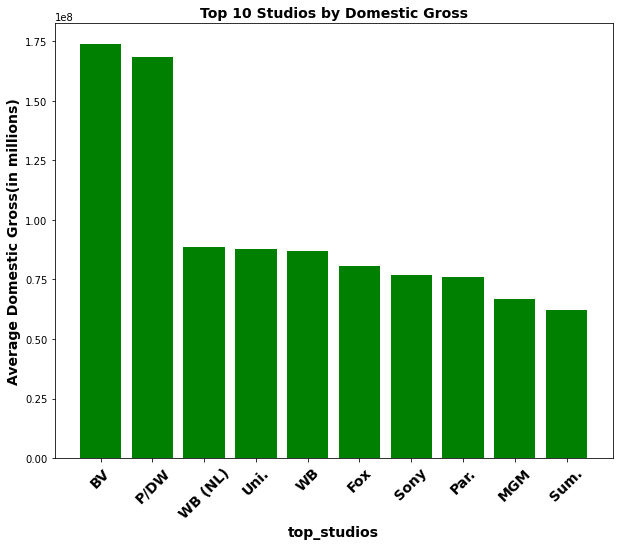

In [389]:
# Create a bar plot of the top 10 studios by domestic gross
plt.bar(top_studios['domestic_gross'].index, top_studios['domestic_gross'].values, color = 'green')
plt.xticks(rotation = 45, fontsize=14, fontweight= 'bold')
plt.xlabel("top_studios", fontsize=14, fontweight='bold')
plt.ylabel("Average Domestic Gross(in millions)", fontsize =14, fontweight= 'bold')
plt.title("Top 10 Studios by Domestic Gross", fontsize=14, fontweight = 'bold')
plt.gcf().set_size_inches(10,8)
plt.show()

The graph displays the top 10 studios based on their domestic gross in millions. The graph is a bar chart, where the x-axis shows the name of the studios, and the y-axis shows their domestic gross in millions. The bar chart is easy to read and understand, and the use of color can enhance the presentation.
Based on the graph, it is clear that the Buena Vista(BV) is the top-grossing studio, with a domestic gross of over $1 5billion, followed by Warner Bros. Pictures, Universal

# 2. im.db dataset

# Data understanding

In [1]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('im.db')

In [2]:
# import data from movie_ratings
im_df1 = pd.read_sql("""
select * from movie_ratings

""", conn)


In [3]:

im_df1

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [4]:
# checking for any null  values in the data
im_df1.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [5]:
# import data from two movie_basics table 
im_df = pd.read_sql("""
select * from movie_basics

""", conn)
im_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [395]:
im_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [396]:
# summing the number of missing values
im_df.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [397]:
# checking for any duplicated values and we found out 
im_df.duplicated().sum()

0

# Joining the two tables

In [398]:
#joining the 2 tables using movie_id
im_df = pd.read_sql("""
SELECT 
primary_title, start_year, genres, averagerating, numvotes
                  FROM movie_basics AS MB
                  JOIN movie_ratings AS MR
                   ON MB.movie_id = MR.movie_id;


""", conn)
im_df

,primary_title,start_year,genres,averagerating,numvotes
0,Sunghursh,2013,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,2019,"Biography,Drama",7.2,43
2,The Other Side of the Wind,2018,Drama,6.9,4517
3,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13
4,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...
73851,Diabolik sono io,2019,Documentary,6.2,6
73852,Sokagin Çocuklari,2019,"Drama,Family",8.7,136
73853,Albatross,2017,Documentary,8.5,8
73854,La vida sense la Sara Amat,2019,None,6.6,5


In [399]:

im_db = pd.read_sql("""
                  SELECT primary_title, start_year, genres, averagerating, numvotes
                  FROM movie_basics AS MB
                  JOIN movie_ratings AS MR
                   ON MB.movie_id = MR.movie_id
                   WHERE numvotes > 500000 AND averagerating BETWEEN 6.7 AND 9.0
                   ORDER BY numvotes DESC
                   limit 50;
                  """, conn)

In [400]:
im_db

,primary_title,start_year,genres,averagerating,numvotes
0,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066
1,The Dark Knight Rises,2012,"Action,Thriller",8.4,1387769
2,Interstellar,2014,"Adventure,Drama,Sci-Fi",8.6,1299334
3,Django Unchained,2012,"Drama,Western",8.4,1211405
4,The Avengers,2012,"Action,Adventure,Sci-Fi",8.1,1183655
5,The Wolf of Wall Street,2013,"Biography,Crime,Drama",8.2,1035358
6,Shutter Island,2010,"Mystery,Thriller",8.1,1005960
7,Guardians of the Galaxy,2014,"Action,Adventure,Comedy",8.1,948394
8,Deadpool,2016,"Action,Adventure,Comedy",8.0,820847
9,The Hunger Games,2012,"Action,Adventure,Sci-Fi",7.2,795227


In [401]:
[im_db["genres"].value_counts()]

[Action,Adventure,Sci-Fi       16
 Action,Adventure,Comedy        3
 Action,Adventure,Fantasy       3
 Biography,Drama,History        2
 Adventure,Drama,Sci-Fi         2
 Action,Drama,Sci-Fi            1
 Drama,Sci-Fi,Thriller          1
 Comedy,Drama,Romance           1
 Action,Adventure,Horror        1
 Biography,Comedy,Drama         1
 Action,Adventure,Thriller      1
 Adventure,Animation,Comedy     1
 Biography,Drama,Thriller       1
 Adventure,Fantasy              1
 Adventure,Drama,Fantasy        1
 Action,Adventure,Biography     1
 Crime,Mystery,Thriller         1
 Adventure,Family,Fantasy       1
 Drama,Music                    1
 Action,Thriller                1
 Biography,Crime,Drama          1
 Adventure,Comedy,Crime         1
 Action,Sci-Fi                  1
 Mystery,Thriller               1
 Biography,Drama                1
 Action,Adventure,Animation     1
 Drama,Western                  1
 Drama,Thriller                 1
 Drama,Mystery,Thriller         1
 Name: genres,

Checking if there are any null values in the dataset

In [402]:

null_values = im_df.isna().sum().sum()

if null_values == 0:
    print ('there are {} null values'. format(null_values))
else:
        print ('there are {} null values'. format(null_values))
def duplicate_values(item):
    duplicates = []
    for  x in item.duplicated():
        duplicates.append(x)
    if len(set(duplicates)) == 1:
        print('there are no duplicate rows')
    else: 
        print('there are {} duplicate rows'.format(item.duplicated.value_counts().sum()))
        
duplicate_values(im_db)

there are 804 null values
there are no duplicate rows


In [403]:
# checking the dtypes of the columns in data 
im_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   primary_title  73856 non-null  object 
 1   start_year     73856 non-null  int64  
 2   genres         73052 non-null  object 
 3   averagerating  73856 non-null  float64
 4   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.8+ MB


In [404]:
grouped = im_db.groupby('genres')
grouped.get_group("Action,Adventure,Sci-Fi")

,primary_title,start_year,genres,averagerating,numvotes
0,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066
4,The Avengers,2012,"Action,Adventure,Sci-Fi",8.1,1183655
9,The Hunger Games,2012,"Action,Adventure,Sci-Fi",7.2,795227
11,Mad Max: Fury Road,2015,"Action,Adventure,Sci-Fi",8.1,780910
15,Iron Man 3,2013,"Action,Adventure,Sci-Fi",7.2,692794
21,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",8.5,670926
22,Captain America: The First Avenger,2011,"Action,Adventure,Sci-Fi",6.9,668137
23,Captain America: The Winter Soldier,2014,"Action,Adventure,Sci-Fi",7.8,666252
24,Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi",7.3,665594
25,Iron Man 2,2010,"Action,Adventure,Sci-Fi",7.0,657690


In [405]:
genres_sorted_mean = pd.DataFrame(im_db.groupby("genres")["numvotes"].mean()).sort_values(by="numvotes", ascending= False).head(10)
genres_sorted_mean

,numvotes
genres,
"Action,Thriller",1.387769e+06
"Drama,Western",1.211405e+06
"Biography,Crime,Drama",1.035358e+06
"Mystery,Thriller",1.005960e+06
"Adventure,Drama,Sci-Fi",9.897250e+05
"Action,Adventure,Comedy",7.712503e+05
"Action,Adventure,Sci-Fi",7.623030e+05
"Drama,Mystery,Thriller",7.615920e+05
"Adventure,Family,Fantasy",7.196290e+05


# Analysis

There is competition between different genres movies in the industry. The bar graph below shows how different movies are doing.

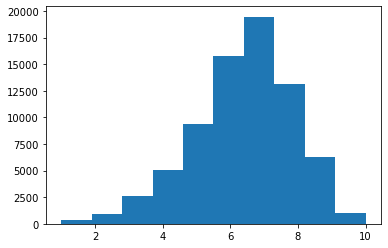

In [406]:
plt.hist(im_df["averagerating"], bins = 10);

The histogram has 10 bins which represent the range of values of 'averagerating' data divided into 10 equal intervals. The x-axis represents the intervals and the y-axis shows the count of observations that fall within each bin.

The distribution of 'averagerating' appears to be slightly skewed to the right, indicating that the majority of the films have a rating of 6-8 on a scale of 1-10.

# In this section we are going to look at the best performing genres in the industry

In [407]:
im_db = pd.read_sql("""
                  SELECT primary_title, start_year, genres, averagerating, numvotes
                  FROM movie_basics AS MB
                  JOIN movie_ratings AS MR
                   ON MB.movie_id = MR.movie_id
                   WHERE numvotes > 500000 AND averagerating BETWEEN 6.7 AND 9.0
                   ORDER BY numvotes DESC
                   limit 50;
                  """, conn)

In [408]:
im_db

,primary_title,start_year,genres,averagerating,numvotes
0,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066
1,The Dark Knight Rises,2012,"Action,Thriller",8.4,1387769
2,Interstellar,2014,"Adventure,Drama,Sci-Fi",8.6,1299334
3,Django Unchained,2012,"Drama,Western",8.4,1211405
4,The Avengers,2012,"Action,Adventure,Sci-Fi",8.1,1183655
5,The Wolf of Wall Street,2013,"Biography,Crime,Drama",8.2,1035358
6,Shutter Island,2010,"Mystery,Thriller",8.1,1005960
7,Guardians of the Galaxy,2014,"Action,Adventure,Comedy",8.1,948394
8,Deadpool,2016,"Action,Adventure,Comedy",8.0,820847
9,The Hunger Games,2012,"Action,Adventure,Sci-Fi",7.2,795227


In [409]:
# sort the data inorder to plot
genres_sorted_mean = pd.DataFrame(im_db.groupby("genres")["numvotes"].mean()).sort_values(by="numvotes", ascending= False).head(10)
genres_sorted_mean

,numvotes
genres,
"Action,Thriller",1.387769e+06
"Drama,Western",1.211405e+06
"Biography,Crime,Drama",1.035358e+06
"Mystery,Thriller",1.005960e+06
"Adventure,Drama,Sci-Fi",9.897250e+05
"Action,Adventure,Comedy",7.712503e+05
"Action,Adventure,Sci-Fi",7.623030e+05
"Drama,Mystery,Thriller",7.615920e+05
"Adventure,Family,Fantasy",7.196290e+05


# Analysis for competiton between different genres in the industry

There is competition between different genres movies in the industry. The bar graph below shows how different movies are doing.

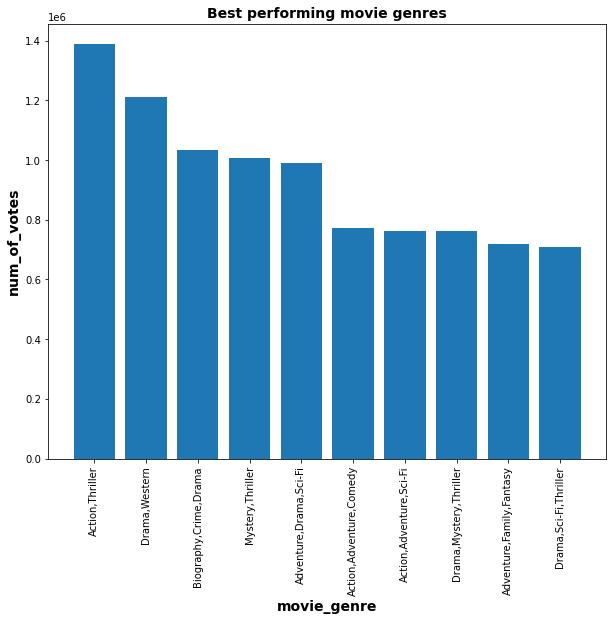

In [410]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation=90, fontsize=10)
y = genres_sorted_mean["numvotes"]
plt.xlabel("movie_genre", fontsize=14, fontweight='bold')
plt.ylabel("num_of_votes", fontsize =14, fontweight= 'bold')
plt.title("Best performing movie genres", fontsize =14, fontweight= 'bold')

plt.bar(y.index, y.values);

The plot can be useful in identifying which movie genres are more popular among users, which can be helpful in making decisions related to marketing and distribution of movies.


# 3.tn  movie budget dataset

# Data understanding

The tn.movie_budgets includes the budget that was put across to produce a movie and the the returns it made both locally and internationally, i.e domestic and foreign gross

In [411]:
movie_budget = pd.read_csv("tn.movie_budgets.csv" , index_col=0)
movie_budget

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


In [412]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [413]:
#checking the missing values in the movie_budget dataset which s
movie_budget.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [414]:
# The movie budget
movie_budget.duplicated().value_counts()

False    5782
dtype: int64

# Data cleaning

In [415]:
#we convert production_budget, domestic_gross and worldwide_gross columns from objects to floats
#we then remove the dollar signs ($) and commas from the values
movie_budget['production_budget'] = movie_budget['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)


In [416]:
#we then verify that the values in the production_budget, domestic_gross and worldwide_gross columns are now float data types
movie_budget.dtypes
print(movie_budget.dtypes)

release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object


In [417]:
movie_budget['release_date'] = pd.to_datetime(movie_budget['release_date'])
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   movie              5782 non-null   object        
 2   production_budget  5782 non-null   float64       
 3   domestic_gross     5782 non-null   float64       
 4   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 271.0+ KB


In [418]:
movie_budget

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...
78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00
79,1999-04-02,Following,6000.0,48482.0,2.404950e+05
80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03


create a new column of the ret

In [419]:
movie_budget['ROI'] = ((movie_budget['worldwide_gross'] - movie_budget['production_budget']) / movie_budget['production_budget']) * 100
movie_budget.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
id,,,,,,
1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,553.257713
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,154.667286
3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-57.210757
4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,324.384139
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,315.369636


In [420]:
movie_budget.head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
id,,,,,,
1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,553.257713
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,154.667286
3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-57.210757
4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,324.384139
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,315.369636
6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,571.016739
7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,582.711400
8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08,221.140142
9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,118.648403


In [421]:
movie_budget_sample = movie_budget.sort_values(by = 'ROI', ascending= False).head(20).iloc[1:20]
movie_budget_sample

,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
id,,,,,,
14,1980-03-21,Mad Max,200000.0,8750000.0,99750000.0,49775.000000
93,2009-09-25,Paranormal Activity,450000.0,107918810.0,194183034.0,43051.785333
80,2015-07-10,The Gallows,100000.0,22764410.0,41656474.0,41556.474000
7,1999-07-14,The Blair Witch Project,600000.0,140539099.0,248300000.0,41283.333333
10,2004-05-07,Super Size Me,65000.0,11529368.0,22233808.0,34105.858462
47,1942-08-13,Bambi,858000.0,102797000.0,268000000.0,31135.431235
74,1993-02-26,El Mariachi,7000.0,2040920.0,2041928.0,29070.400000
77,1968-10-01,Night of the Living Dead,114000.0,12087064.0,30087064.0,26292.161404
11,1976-11-21,Rocky,1000000.0,117235147.0,225000000.0,22400.000000


In [422]:
#summary statistics
movie_budget.describe()

,production_budget,domestic_gross,worldwide_gross,ROI
count,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000
mean,3.158776e+07,4.187333e+07,9.148746e+07,380.016137
std,4.181208e+07,6.824060e+07,1.747200e+08,2953.028231
min,1.100000e+03,0.000000e+00,0.000000e+00,-100.000000
25%,5.000000e+06,1.429534e+06,4.125415e+06,-50.770440
50%,1.700000e+07,1.722594e+07,2.798445e+07,70.830983
75%,4.000000e+07,5.234866e+07,9.764584e+07,275.834608
max,4.250000e+08,9.366622e+08,2.776345e+09,179900.000000


# Analysis

Inorder to understand the the return on investment that the movies made, we'll have to look at the buget that the movies had and what they made after the movie was made i.e the return on investment. This will help us to understand the movies that made the most profit and hence will be able to know what type of movies to produce

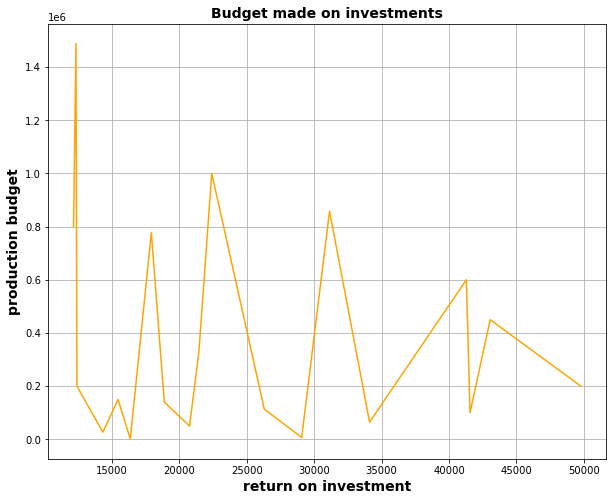

In [423]:
x = movie_budget_sample["ROI"]
y = movie_budget_sample['production_budget'] 
plt.xlabel("return on investment", fontsize=14, fontweight='bold')
plt.ylabel("production budget", fontsize =14, fontweight= 'bold')
plt.title("Budget made on investments", fontsize=14, fontweight = 'bold')
plt.gcf().set_size_inches(10,8)
plt.grid()
plt.plot(x,y, color = 'orange');

 Observation

From the above graph, we can clearly see and say that there is no linear realtionship between the production budget and the return on invest. I would highly recommend the Microsoft team to review other key factors such as movie genre, market penetration and visibility to predict and influence the ROI when it comes to production of quality movies

In this next graph we are going to compare the average return on investment in different months

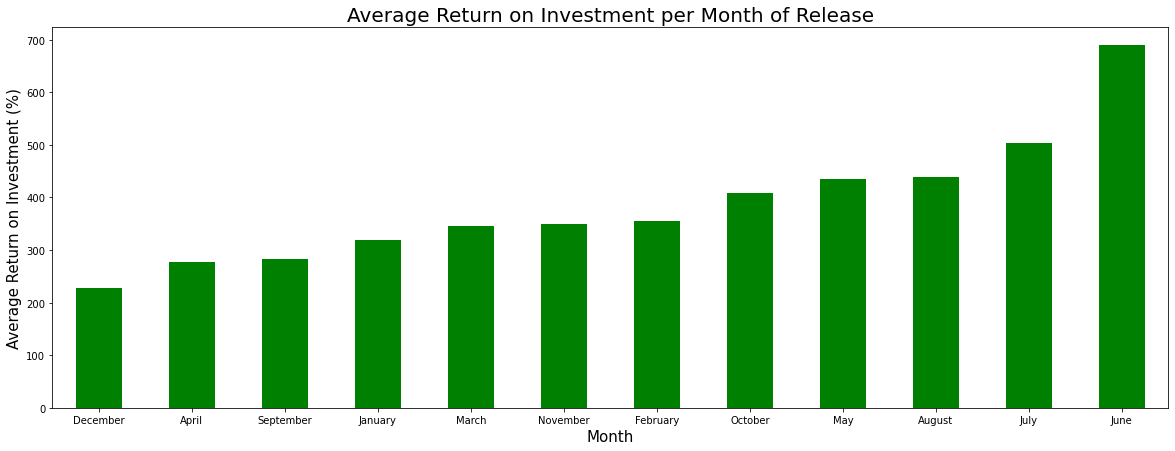

In [424]:
fig, ax = plt.subplots(figsize=(20,7))
release_time.groupby('release_month')['ROI'].mean().sort_values().plot(kind='bar', color='green')
ax.set_xlabel('Month', fontsize=15)
plt.xticks(rotation=0)
ax.set_ylabel('Average Return on Investment (%)', fontsize=15)
ax.set_title('Average Return on Investment per Month of Release', fontsize=20);

Observation

We can infer which months have higher or lower ROI for movie releases by examining this plot. For example, if the bars are generally higher towards the right-hand side of the plot (i.e., later months of the year), it could imply that movies released during the holiday season have a higher ROI. If, on the other hand, the bars are generally lower towards the left-hand side of the plot (i.e., the earlier months of the year), it may imply that films released early in the year have lower ROI. Overall

In this next graph we are going to look at the number of movies in different months in the year.This is going to help microsoft determine which mont

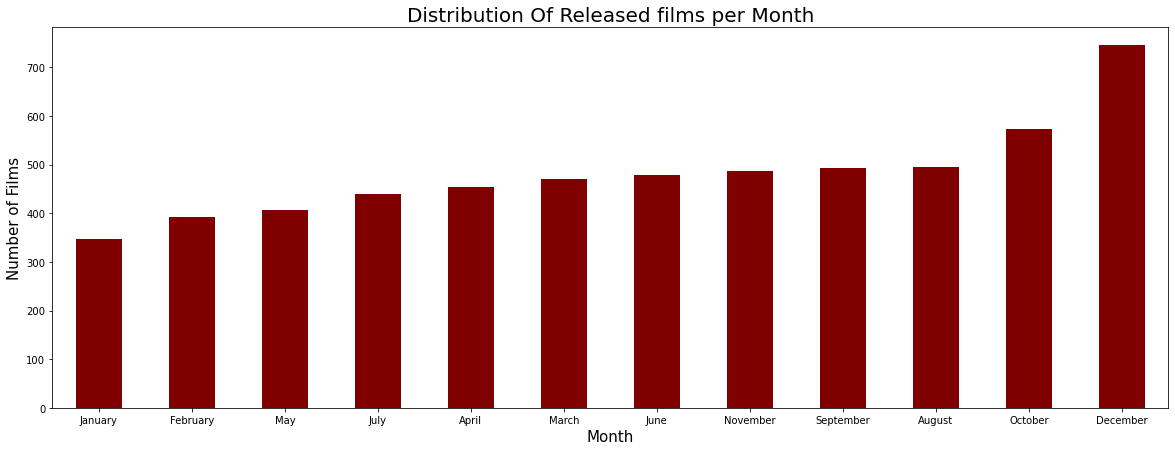

In [425]:
# Create a plot that shows the number of films released each month
fig, ax = plt.subplots(figsize=(20,7))
release_time.groupby('release_month')['movie'].count().sort_values().plot(kind='bar', color='maroon')
ax.set_xlabel('Month', fontsize=15)
plt.xticks(rotation=0)
ax.set_ylabel('Number of Films', fontsize=15)
ax.set_title('Distribution Of Released films per Month', fontsize=20);

The months with the most film releases are August, September, and October. This data can help microsoft studios to plan their release schedules, as they may face increased competition during these months. The months with the fewest film releases are January, February, and April. These months may provide an opportunity for microsoft to release their films with less competition.

# Recommendations

1.Microsoft should consider the type of movies they produce i.e the genres of the movies.From what we have seen that Action ,thriller genre has the top number of votes meaning that most people watch the movies.Microsoft  should consider producing the movies that are in the genre that is most popular

2.microsoft should consider producing their movies in the months January and February since we can see that during the months of August, October and December its when most movies are produced. This is going to reduce the compettition since not most movies are released at the beggining of the year


3.Microsoft should consider collaborating with studios such as Buena vista(BV) since it seems to be producing the best movies.This will help the microsoft in production of the most popular movies and will have great retuns 

4.While producing the movies, apart from the bud Microsoft should consider factors such as the runtime,time of release,how to penetrate the market when it comes to production of quality movies.